# Figure 3d. Cell-type specific colocalization versus fine-mapping eQTL.

The fraction of cell-type specific colocalizations (measured at the level of CoS) for different brain cell types recovered by fine-mapping within the cell type.

In [1]:
library(tidyverse)
library(ggpattern)
library(ggpubr)
library(cowplot)
res <- readRDS("data/cell_type_specific_colocalization.rds")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend


The following object is masked from ‘package:lubridate’:

    stamp




## Organize input data¶

In [2]:
cell_types <- c("Microglia", "Excitatory\n neuron", "Astrocytes", "Oligodendrocytes", "Oligodendrocyte\n Progenitor", "Inhibitory\n neuron")
tables <- sapply(res, function(rr) table(rr$finemapping_overlap))
colnames(tables) <- cell_types
tables

,Microglia,Excitatory neuron,Astrocytes,Oligodendrocytes,Oligodendrocyte Progenitor,Inhibitory neuron
FALSE,177,769,411,287,101,268
TRUE,182,1384,630,451,103,210


In [3]:
data <- data.frame(
  CellType = c("Microglia", "Excitatory\n neuron", "Astrocytes", "Oligodendrocytes", "Oligodendrocyte\n Progenitor", "Inhibitory\n neuron"),
  cbonly = tables[1,],
  both = tables[2,]
)
# Convert data to long format
data_long <- data %>%
  pivot_longer(cols = c(cbonly, both), names_to = "Status", values_to = "Count") %>%
  group_by(CellType) %>%
  mutate(TotalCount = sum(Count), Percentage = Count / sum(Count) * 100) %>%
  ungroup() %>%
  mutate(CellType = fct_reorder(CellType, TotalCount, .desc = TRUE),
         Status = recode(Status, "both" = "Shared with Fine-mapping", "cbonly" = "ColocBoost Only"))
data_long$Status <- factor(data_long$Status, 
                           levels = c("ColocBoost Only", "Shared with Fine-mapping"))

## Distribution plot

In [4]:
library(ggplot2)
library(ggsci)
p1 <- ggplot(data_long, aes(y = CellType, x = Count, fill = Status)) +
  geom_bar(stat = "identity", position = "stack") + # Stacked bar chart
  scale_fill_npg() +
  labs(
    x = "Number of CoS",
    y = NULL,
    fill = "Proportion",
    title = "Cell-type specific colocalization"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    plot.title = element_text( size = 28, hjust = 0.5 ),
    axis.title.x = element_text( margin = margin(t = 0), size = 24), # Adjust x axis title margin
    axis.title.y = element_text(margin = margin(r = 10), size = 24), # Adjust y axis title margin
    axis.text.x = element_text(margin = margin(t = 0), size = 18), # Adjust x axis text margin
    axis.text.y = element_text(margin = margin(r = 5), size = 18), # Adjust y axis text margin
    legend.position = "inside",
    legend.justification = c(0.95, 0.95),
    legend.title = element_text(size = 0),
    legend.text = element_text(size = 18),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  )

In [7]:
round(tables[1,] / colSums(tables), digits = 3) * 100

Microglia          Excitatory\n neuron 
                        49.3                         35.7 
                  Astrocytes             Oligodendrocytes 
                        39.5                         38.9 
Oligodendrocyte\n Progenitor          Inhibitory\n neuron 
                        49.5                         56.1

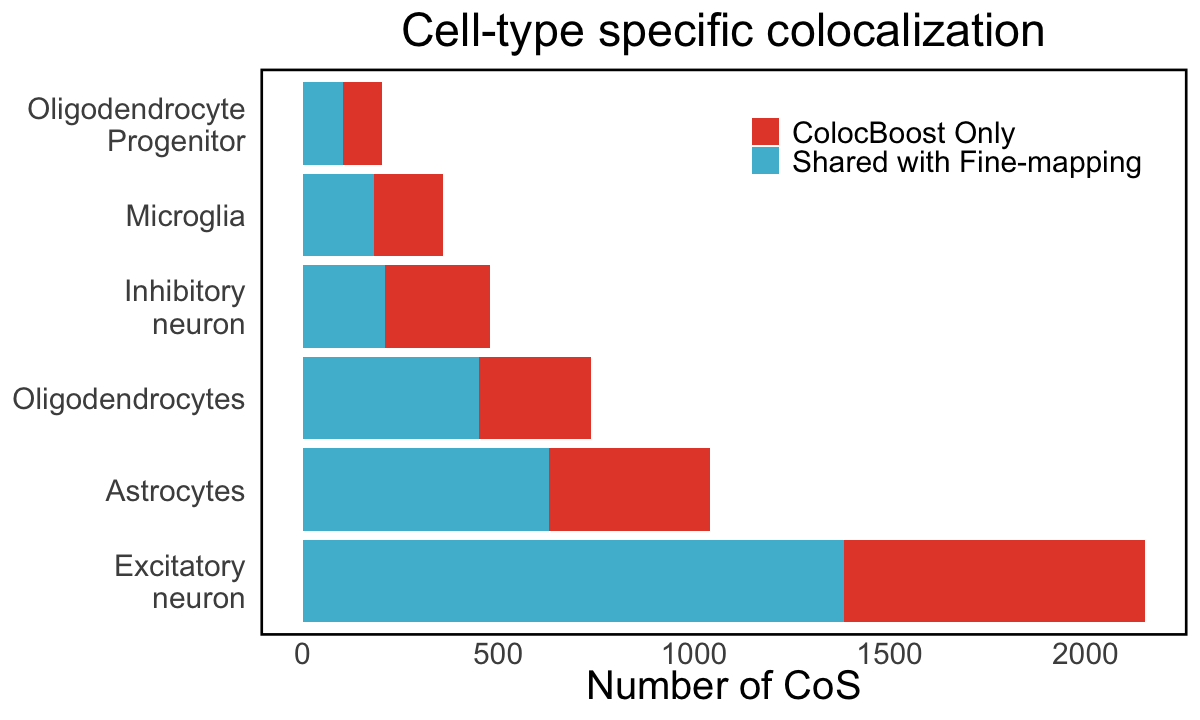

In [6]:
options(repr.plot.width = 10, repr.plot.height = 6)
p1